#### This notebook explores the creation of a Dense Neural Network (DNN) as a baseline for performance comparisons.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [16]:
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

In [17]:
# One-hot encode the label (categories) using tensorflow's API

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train[187]).astype(int)
y_test = to_categorical(test[187]).astype(int)

In [18]:
# Confirm one-hot encoding

y_train

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [19]:
# Create X training and testing sets

X_train = train.iloc[:,:187].values
X_test = test.iloc[:,:187].values

In [20]:
X_train

array([[0.97794116, 0.92647058, 0.68137252, ..., 0.        , 0.        ,
        0.        ],
       [0.96011394, 0.86324787, 0.46153846, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.65945947, 0.18648648, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90612245, 0.62448978, 0.59591836, ..., 0.        , 0.        ,
        0.        ],
       [0.85822785, 0.64556962, 0.84556961, ..., 0.        , 0.        ,
        0.        ],
       [0.90150636, 0.84588647, 0.80069524, ..., 0.        , 0.        ,
        0.        ]])

In [21]:
# Confirm X_train shape

X_train.shape

(87554, 187)

#### Begin DNN building

In [22]:
# We will use a DNN with two hidden layers. 
# The final output layer's activation function is 'softmax' in order normalize the outputs (from weighted sum values into probablities that sum to one).

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

in_nn = Input(shape=(X_train.shape[1],), name='in_nn')
dense2 = Dense(units=64, activation='relu')(in_nn)
dense3 = Dense(units=32, activation='relu')(dense2)
dense4 = Dense(units=5, activation='softmax')(dense3)

model = Model(inputs=in_nn, outputs=dense4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in_nn (InputLayer)          [(None, 187)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                12032     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 5)                 165       
                                                                 
Total params: 14,277
Trainable params: 14,277
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
2737/2737 [==============================] - 11s 4ms/step - loss: 0.2792 - accuracy: 0.9236
Epoch 2/5
2737/2737 [==============================] - 11s 4ms/step - loss: 0.1617 - accuracy: 0.9557
Epoch 3/5
2737/2737 [==============================] - 11s 4ms/step - loss: 0.1350 - accuracy: 0.9622
Epoch 4/5
2737/2737 [==============================] - 11s 4ms/step - loss: 0.1198 - accuracy: 0.9670
Epoch 5/5
2737/2737 [==============================] - 11s 4ms/step - loss: 0.1093 - accuracy: 0.9698


In [25]:
# Obtain the loss and accuracy of each subsequent epoch

history.history

{'loss': [0.27919116616249084,
  0.161677747964859,
  0.13495880365371704,
  0.11984597891569138,
  0.10931570827960968],
 'accuracy': [0.9236128330230713,
  0.9556844830513,
  0.96224045753479,
  0.9670146703720093,
  0.9697901010513306]}

In [26]:
# Evaluate the model on the test data

results = model.evaluate(X_test, y_test, batch_size=16)

1369/1369 [==============================] - 4s 3ms/step - loss: 0.1145 - accuracy: 0.9685


In [27]:
# Print the loss and accuracy on the test dataset

print("test loss, test acc:", results)

test loss, test acc: [0.1145075187087059, 0.9684816598892212]


In [28]:
# Create y_predict for confusion matrix 

y_pred = model.predict(X_test)

In [29]:
# Confirm y_predict

y_pred

array([[9.97892916e-01, 2.05003330e-03, 3.08991293e-05, 2.06298319e-05,
        5.57971771e-06],
       [9.05677199e-01, 8.28003809e-02, 8.35252460e-03, 8.22662376e-04,
        2.34710868e-03],
       [9.80605781e-01, 1.42351985e-02, 1.49919244e-03, 8.98981962e-05,
        3.56994383e-03],
       ...,
       [1.34380057e-01, 1.10076005e-02, 1.64135754e-01, 6.67702314e-03,
        6.83799565e-01],
       [1.00138923e-03, 1.48578285e-04, 5.31373698e-05, 8.00071393e-06,
        9.98788893e-01],
       [8.59636639e-04, 1.60133641e-05, 1.10487417e-05, 4.94828191e-06,
        9.99108374e-01]], dtype=float32)

Normalized confusion matrix


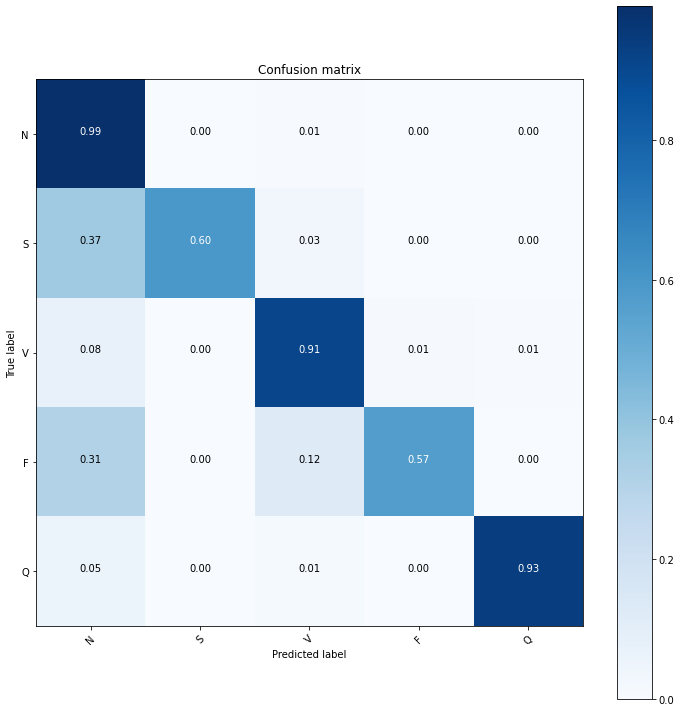

In [36]:
# The following function plots the confusion matrix. Can toggle normalization.

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix')
plt.show()